In [1]:
from Parser import parse_frames
from scipy.signal import medfilt
from Functions import find_extremas, filter_extremas, detect_side, analyse_each_rep
from JointAngles import JointAngles
import numpy as np
import math
import glob
import os
import itertools
import itertools
import pickle
import matplotlib.pyplot as plt


Starting...
Keypoints from folder: output_points_shoulder_press
Detected side: front
----------------------Filtering minimas---------------------------------------------------

Size of left minimas array: 2
---------------------------------------------------------------------------------------------
----------------------Filtering minimas----------------------------------------------------

Size of right minimas array: 2
----------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------                                             
LEFT ARM                                              
------------------------------------------------------------------------------------------------------------------------


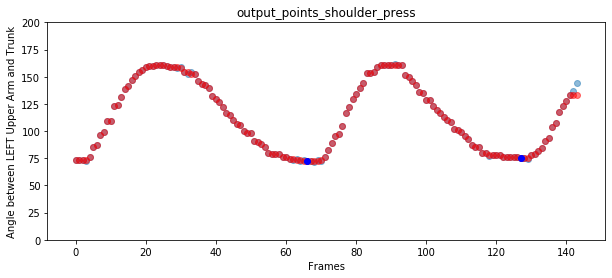

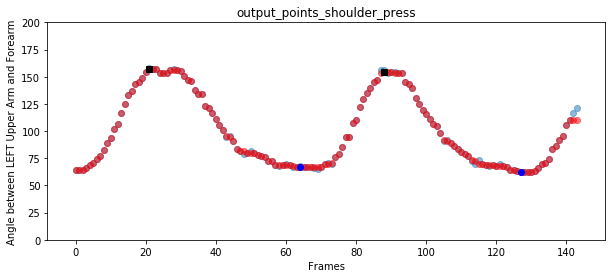

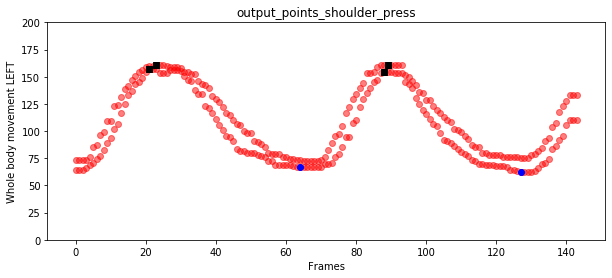


------------------------------------------------------------------------------------------------------------------------                                                                                               
RIGHT ARM                                                                                               
------------------------------------------------------------------------------------------------------------------------


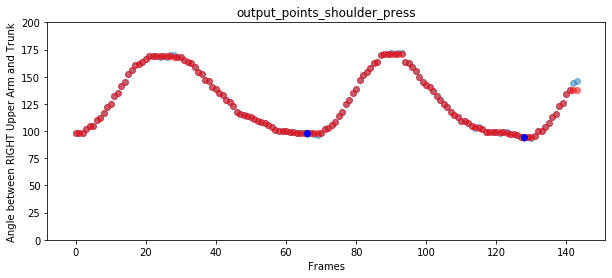

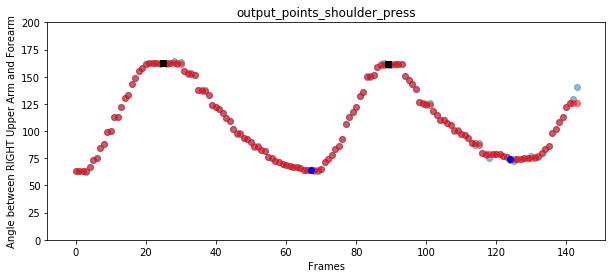

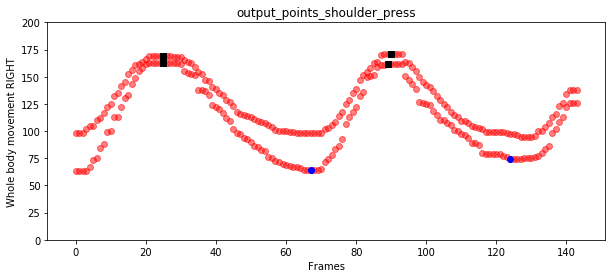

Number of reps performed: 2

Repetition: 1

Left upper arm - left forearm -> Minimum Angle:64.24961707088967
Left upper arm - left forearm -> Maximum Angle:156.83333520004982
Left upper arm - trunk -> Maximum Angle: 160.82777510678474
Left upper arm - trunk -> Minimum Angle: 72.72769816200267

Right upper arm - left forearm -> Minimum Angle:63.633586792430194
Right upper arm - left forearm -> Maximum Angle:162.4714904270343
Right upper arm - trunk -> Maximum Angle: 168.9669282859816
Right upper arm - trunk -> Minimum Angle: 98.213682213201


Repetition: 2

Left upper arm - left forearm -> Minimum Angle:62.43546908312009
Left upper arm - left forearm -> Maximum Angle:153.88374446290553
Left upper arm - trunk -> Maximum Angle: 160.59223023033837
Left upper arm - trunk -> Minimum Angle: 72.54524538633859

Right upper arm - left forearm -> Minimum Angle:64.45101792102415
Right upper arm - left forearm -> Maximum Angle:161.42721147913082
Right upper arm - trunk -> Maximum Angle: 171.2769698

In [2]:
# modify this path for other videos 
# input_folder = "/home/aleko/Documents/Projects/IndividualProject/bicepvid"
input_folder = "C:\\Users\\altaok\\Documents\\GitHub\\IndividualProject\\keypoints_for_all\\shoulder press"
# input_folder = 'C:\\Users\\ak5u16\\Desktop\\IndividualProject\\keypoints_for_all\\shoulder press'
folder_paths = glob.glob(os.path.join(input_folder, 'output*'))     

min_upper_arm_forearm = [] 
max_upper_arm_forearm = []
max_upper_arm_trunk = []
min_upper_arm_trunk = []


for folder in folder_paths:
    print("Starting..." + "\nKeypoints from folder: " + os.path.basename(folder))
    video_name = os.path.basename(folder)
    frame_poses = parse_frames(folder)
       
    joint_angles = JointAngles('shoulder press', frame_poses)
    print('Detected side: ' + joint_angles.side)
   

    left_upArm_trunk_angles = np.array(joint_angles.left_upArm_trunk_angles)
    left_upArm_trunk_angles_filtered = medfilt(medfilt(left_upArm_trunk_angles, 5), 5)
    
    right_upArm_trunk_angles = np.array(joint_angles.right_upArm_trunk_angles)
    right_upArm_trunk_angles_filtered = medfilt(medfilt(right_upArm_trunk_angles, 5), 5)
    
    left_upArm_forearm_angles = np.array(joint_angles.left_upArm_forearm_angles)
    left_upArm_forearm_angles_filtered = medfilt(medfilt(left_upArm_forearm_angles, 5), 5)
    
    right_upArm_forearm_angles = np.array(joint_angles.right_upArm_forearm_angles)
    right_upArm_forearm_angles_filtered = medfilt(medfilt(right_upArm_forearm_angles, 5), 5)
    
        
    # Find left upper arm and trunk maximum angles to detect wrong form 
    left_upArm_trunk_maximas = find_extremas(left_upArm_trunk_angles_filtered)
    left_upArm_trunk_maximas = filter_extremas(left_upArm_trunk_angles_filtered, left_upArm_trunk_maximas)
    indexesmax1a = np.array([np.argwhere(left_upArm_trunk_angles_filtered == maxima)[0][0] for maxima in left_upArm_trunk_maximas])
   
    
    # print("Largest angles between upper arm and trunk: " + str(upArm_trunk_maximas))
    # Find right upper arm and trunk maximum angles to detect wrong form 
    right_upArm_trunk_maximas = find_extremas(right_upArm_trunk_angles_filtered)
    right_upArm_trunk_maximas = filter_extremas(right_upArm_trunk_angles_filtered, right_upArm_trunk_maximas)
    indexesmax1b = np.array([np.argwhere(right_upArm_trunk_angles_filtered == maxima)[0][0] for maxima in right_upArm_trunk_maximas])
   
    # Count repetitions
    left_upArm_forearm_maximas = find_extremas(left_upArm_forearm_angles_filtered)    
    left_upArm_forearm_maximas = filter_extremas(left_upArm_forearm_angles_filtered, left_upArm_forearm_maximas)
    indexesmax2a = np.array([np.argwhere(left_upArm_forearm_angles_filtered == maxima)[0][0] for maxima in left_upArm_forearm_maximas])
   
    # print("Number of maxima points between Upper Arm and Forearm: " + str(upArm_forearm_maximas.size))
    # print(upArm_forearm_maximas)
    
    right_upArm_forearm_maximas = find_extremas(right_upArm_forearm_angles_filtered) 
    right_upArm_forearm_maximas = filter_extremas(right_upArm_forearm_angles_filtered, right_upArm_forearm_maximas)
    indexesmax2b = np.array([np.argwhere(right_upArm_forearm_angles_filtered == maxima)[0][0] for maxima in right_upArm_forearm_maximas])
   

    # Find upper arm and forearm minimum points to count reps     
    left_upArm_forearm_minimas = find_extremas(left_upArm_forearm_angles_filtered, maxima=False)
    
    left_upArm_forearm_minimas = filter_extremas(left_upArm_forearm_angles_filtered,left_upArm_forearm_minimas, False)
    indexesmin1a = np.array([np.argwhere(left_upArm_forearm_angles_filtered == minima)[0][0] for minima in left_upArm_forearm_minimas])
  
 
    # print(left_upArm_forearm_minimas)
    
    right_upArm_forearm_minimas = find_extremas(right_upArm_forearm_angles_filtered, maxima=False)
   
    right_upArm_forearm_minimas = filter_extremas(right_upArm_forearm_angles_filtered, right_upArm_forearm_minimas, False)
    indexesmin1b = np.array([np.argwhere(right_upArm_forearm_angles_filtered == minima)[0][0] for minima in right_upArm_forearm_minimas])
  
   
    print('----------------------Filtering minimas---------------------------------------------------')
    left_upArm_trunk_minimas = find_extremas(left_upArm_trunk_angles_filtered, maxima=False)
    left_upArm_trunk_minimas = filter_extremas(left_upArm_trunk_angles_filtered, left_upArm_trunk_minimas, False)
    indexesmin2a = np.array([np.argwhere(left_upArm_trunk_angles_filtered == minima)[0][0] for minima in left_upArm_trunk_minimas])
    
    print("\nSize of left minimas array: " + str(left_upArm_trunk_minimas.size))
    print('---------------------------------------------------------------------------------------------')
    print('----------------------Filtering minimas----------------------------------------------------')
    right_upArm_trunk_minimas = find_extremas(right_upArm_trunk_angles_filtered, maxima=False)
    right_upArm_trunk_minimas = filter_extremas(right_upArm_trunk_angles_filtered, right_upArm_trunk_minimas, False)
    indexesmin2b = np.array([np.argwhere(right_upArm_trunk_angles_filtered == minima)[0][0] for minima in right_upArm_trunk_minimas])
    print("\nSize of right minimas array: " + str(right_upArm_trunk_minimas.size))
    print('----------------------------------------------------------------------------------------------')
    print('\n'+ '-'*120 + '\nLEFT ARM'.center(100) + '\n' + '-'*120 )
    # Plot 1 - Left
    plt.figure(figsize=(10,4))
    plt.scatter(np.arange(left_upArm_trunk_angles.shape[0]), left_upArm_trunk_angles, alpha=0.5)
    plt.scatter(np.arange(left_upArm_trunk_angles_filtered.shape[0]), left_upArm_trunk_angles_filtered, c='r', alpha=0.5)
    plt.title(video_name)
    plt.xlabel('Frames')
    plt.ylabel('Angle between LEFT Upper Arm and Trunk')
    # Set range on y-axis so the plots are consistent
    plt.ylim(0,200)
    
    # Annontate minima points
    plt.plot(indexesmin2a, left_upArm_trunk_angles_filtered[indexesmin2a], 'bo')
    # print(indexesmax1a)
    plt.show()
    
    # Plot 2 - Left
    plt.figure(figsize=(10,4))
    plt.scatter(np.arange(left_upArm_forearm_angles.shape[0]), left_upArm_forearm_angles, alpha=0.5)
    plt.scatter(np.arange(left_upArm_forearm_angles_filtered.shape[0]), left_upArm_forearm_angles_filtered, c='r', alpha=0.5)
    plt.title(video_name)
    plt.xlabel('Frames')
    plt.ylabel('Angle between LEFT Upper Arm and Forearm')
    # Set range on y-axis so the plots are consistent
    plt.ylim(0,200) 
    
    # Annotate minima apoints on the graph   
    max_points1a = left_upArm_forearm_angles_filtered[indexesmax2a]
    min_points1a = left_upArm_forearm_angles_filtered[indexesmin1a]
    plt.plot(indexesmin1a, min_points1a, 'bo')
    plt.plot(indexesmax2a, max_points1a, 'ks')

    """
        # Annotate local maximas
        for maxp, indx in zip(max_points, indexesmax2):
            plt.annotate('local max', xy=(indx, maxp), xytext=(indx, maxp+25),
                    arrowprops=dict(facecolor='black', shrink=0.05))

        # Annotate local minimas
        for minp, indx in zip(min_points, indexesmin):
            plt.annotate('local min', xy=(indx, minp), xytext=(indx, minp-35),
                    arrowprops=dict(facecolor='black', shrink=0.05))     
    """
    
    plt.show()
    
    # Plot 3 - All angles LEFT
    plt.figure(figsize=(10,4))
    plt.scatter(np.arange(left_upArm_forearm_angles_filtered.shape[0]), left_upArm_forearm_angles_filtered, c='r', alpha=0.5)
    plt.scatter(np.arange(left_upArm_trunk_angles_filtered.shape[0]), left_upArm_trunk_angles_filtered, c='r', alpha=0.5)
    
    plt.title(video_name)
    plt.xlabel('Frames')
    plt.ylabel('Whole body movement LEFT')
    # Set range on y-axis so the plots are consistent
    plt.ylim(0,200) 
    # Annotate minima apoints   
    plt.plot(indexesmin1a, left_upArm_forearm_angles_filtered[indexesmin1a], 'bo')
    plt.plot(indexesmax1a, left_upArm_trunk_angles_filtered[indexesmax1a], 'ks')
    plt.plot(indexesmax2a, left_upArm_forearm_angles_filtered[indexesmax2a], 'ks')  
    plt.show()
   
    
    #---------------------------------------------------------------------------------------------------------------------
    # Same for right side
    
    print('\n'+ '-'*120 + '\nRIGHT ARM'.center(200) + '\n' + '-'*120 )
    
    # Plot 3 - Right
    plt.figure(figsize=(10,4))
    plt.scatter(np.arange(right_upArm_trunk_angles.shape[0]), right_upArm_trunk_angles, alpha=0.5)
    plt.scatter(np.arange(right_upArm_trunk_angles_filtered.shape[0]), right_upArm_trunk_angles_filtered, c='r', alpha=0.5)
    plt.title(video_name)
    plt.xlabel('Frames')
    plt.ylabel('Angle between RIGHT Upper Arm and Trunk')
    # Set range on y-axis so the plots are consistent
    plt.ylim(0,200)
    
    # Annontate minima points
    plt.plot(indexesmin2b, right_upArm_trunk_angles_filtered[indexesmin2b], 'bo')
    plt.show()

    # Plot 3 - Right
    plt.figure(figsize=(10,4))
    plt.scatter(np.arange(right_upArm_forearm_angles.shape[0]), right_upArm_forearm_angles, alpha=0.5)
    plt.scatter(np.arange(right_upArm_forearm_angles_filtered.shape[0]), right_upArm_forearm_angles_filtered, c='r', alpha=0.5)
    plt.title(video_name)
    plt.xlabel('Frames')
    plt.ylabel('Angle between RIGHT Upper Arm and Forearm')
    # Set range on y-axis so the plots are consistent
    plt.ylim(0,200) 
    
    # Annotate minima apoints on the graph   
    max_points1b = right_upArm_forearm_angles_filtered[indexesmax2b]
    min_points1b = right_upArm_forearm_angles_filtered[indexesmin1b]
    plt.plot(indexesmin1b, min_points1b, 'bo')
    plt.plot(indexesmax2b, max_points1b, 'ks')
    
    """
        # Annotate local maximas
        for maxp, indx in zip(max_points1b, indexesmax2b):
            plt.annotate('local max', xy=(indx, maxp), xytext=(indx, maxp+25),
                    arrowprops=dict(facecolor='black', shrink=0.05))

        # Annotate local minimas
        for minp, indx in zip(min_points, indexesmin):
            plt.annotate('local min', xy=(indx, minp), xytext=(indx, minp-35),
                    arrowprops=dict(facecolor='black', shrink=0.05))     
    """
    plt.show()


    # Plot 4 - All angles RIGHT
    plt.figure(figsize=(10,4))
    plt.scatter(np.arange(right_upArm_forearm_angles_filtered.shape[0]), right_upArm_forearm_angles_filtered, c='r', alpha=0.5)
    plt.scatter(np.arange(right_upArm_trunk_angles_filtered.shape[0]), right_upArm_trunk_angles_filtered, c='r', alpha=0.5)
    plt.title(video_name)
    plt.xlabel('Frames')
    plt.ylabel('Whole body movement RIGHT')
    # Set range on y-axis so the plots are consistent
    plt.ylim(0,200) 
    # Annotate minima apoints     
    plt.plot(indexesmin1b, right_upArm_forearm_angles_filtered[indexesmin1b], 'bo')
    plt.plot(indexesmax1b, right_upArm_trunk_angles_filtered[indexesmax1b], 'ks')
    plt.plot(indexesmax2b, right_upArm_forearm_angles_filtered[indexesmax2b], 'ks')
    plt.show()
   
    
    # Each rep analysis
    # local minimums for upper arm and forearm are min angles in each rep
    """
    min_upper_arm_forearm1, max_upper_arm_forearm1, min_upper_arm_trunk1, max_upper_arm_trunk1 = analyse_each_rep(exercise='shoulder press', string='thresholds', 
                                                                                                                  extremas1=left_upArm_trunk_minimas, 
                                                                                                                  uf_angles1=left_upArm_forearm_angles_filtered, 
                                                                                                                  ut_angles1=left_upArm_trunk_angles_filtered, 
                                                                                                                  extremas2=right_upArm_trunk_minimas, 
                                                                                                                  uf_angles2=right_upArm_forearm_angles_filtered, 
                                                                                                                  ut_angles2=right_upArm_trunk_angles_filtered)
    
    """
    
    analyse_each_rep(exercise='shoulder press', string='analysis', extremas1=left_upArm_trunk_minimas,
                     uf_angles1=left_upArm_forearm_angles_filtered, ut_angles1=left_upArm_trunk_angles_filtered, 
                     extremas2=right_upArm_trunk_minimas, uf_angles2=right_upArm_forearm_angles_filtered, 
                     ut_angles2=right_upArm_trunk_angles_filtered)
    """ 
    min_upper_arm_forearm = min_upper_arm_forearm + min_upper_arm_forearm1
    max_upper_arm_forearm = max_upper_arm_forearm + max_upper_arm_forearm1
    max_upper_arm_trunk = max_upper_arm_trunk + max_upper_arm_trunk1
    min_upper_arm_trunk = min_upper_arm_trunk + min_upper_arm_trunk1

    

    print('\n' + '='*120 + '\n')
   
print('Minimum in Minimum Upper Arm Forearm threshold: ' + str(min(min_upper_arm_forearm)))
print('Maximum in Minimum Upper Arm Forearm threshold: ' + str(max(min_upper_arm_forearm)))
print('Maximum in maximum Upper Arm Forearm threshold: ' + str(max(max_upper_arm_forearm)))
print('Minimum in maximum Upper Arm Forearm threshold: ' + str(min(max_upper_arm_forearm)))
print('Minimum in Minimum Upper Arm Trunk threshold: ' + str(min(min_upper_arm_trunk)))
print('Maximum in Minimum Upper Arm Trunk threshold: ' + str(max(min_upper_arm_trunk)))
print('Minimum in Maximum Upper Arm Trunk threshold: ' + str(min(max_upper_arm_trunk)))
print('Maximum in Maximum Upper Arm Trunk threshold: ' + str(max(max_upper_arm_trunk)))
"""
